In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re

In [3]:
df = pd.read_csv('resume_dataset.csv')

In [4]:
df.head()

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [5]:
categories = ['HR', 'Designing', 'Managment', 'Information Technology',
       'Education', 'Advocate', 'Business Development',
       'Health & Fitness', 'Agricultural', 'BPO', 'Sales', 'Consultant',
       'Digital Media', 'Automobile', 'Food & Beverages', 'Finance',
       'Apparel', 'Engineering', 'Accountant', 'Building & Construction',
       'Architects', 'Public Relations', 'Banking', 'Arts', 'Aviation']

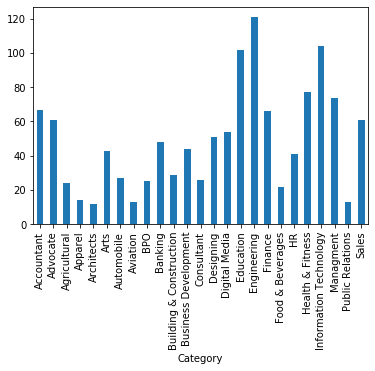

In [6]:
df.groupby('Category').count()['ID'].plot.bar()

In [7]:
cleaned_df = df.drop('ID', axis=1)

In [8]:
cleaned_df.head()

,Category,Resume
0,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [9]:
cleaned_df['Resume'] = df['Resume'].apply(lambda row: row[2:-1])

In [10]:
cleaned_df.head()

,Category,Resume
0,HR,"John H. Smith, P.H.R.\n800-991-5187 | PO Box 1..."
1,HR,Name Surname\nAddress\nMobile No/Email\nPERSON...
2,HR,Anthony Brown\nHR Assistant\nAREAS OF EXPERTIS...
3,HR,www.downloadmela.com\nSatheesh\nEMAIL ID:\nCar...
4,HR,HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert i...


In [11]:
# \\x --> \x (so that regex doesn't count it as an escape sequence)
# \w --> any non whitespace character

# \\x\w\w matches \x--, where - is not a whitespace character
cleaned_df['split_resume'] = cleaned_df['Resume'].apply(
    lambda x: [re.sub(r'\\x\w\w', '', i) for i in x.split('\\n') if len(re.sub(r'\\x\w\w', '', i).strip()) > 0])

In [12]:
cleaned_df.head()

,Category,Resume,split_resume
0,HR,"John H. Smith, P.H.R.\n800-991-5187 | PO Box 1...","[John H. Smith, P.H.R., 800-991-5187 | PO Box ..."
1,HR,Name Surname\nAddress\nMobile No/Email\nPERSON...,"[Name Surname, Address, Mobile No/Email, PERSO..."
2,HR,Anthony Brown\nHR Assistant\nAREAS OF EXPERTIS...,"[Anthony Brown, HR Assistant, AREAS OF EXPERTI..."
3,HR,www.downloadmela.com\nSatheesh\nEMAIL ID:\nCar...,"[www.downloadmela.com, Satheesh, EMAIL ID:, Ca..."
4,HR,HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert i...,"[HUMAN RESOURCES DIRECTOR, Expert in organizat..."


In [13]:
cleaned_df['split_resume'][305]

['Market Your Skills: Interpersonal,',
 'Analytical, Leadership, Communication',
 'Sarah K. Davis',
 '1234 W. Michigan Ave  Chicago, IL 45670  456-7890-1234  sarahdavis@northwestern.edu',
 'EDUCATION',
 'June 2015',
 'Northwestern University, Evanston, IL',
 'Master of Science in Higher Education Administration and Policy',
 'Masters Research Project: What on-the-job experiences at a college union relate most strongly with undergraduate',
 'learning outcomes?',
 'June 2012',
 'Highlight any relevant experience within',
 'University of Virginia, Charlottesville, VA',
 'higher education through internships,',
 'Bachelor of Science in Psychology',
 'graduate assistantships, or volunteer work',
 'Magna Cum Laude',
 'CAREER SERVICES EXPERIENCE',
 'University Career Services, Northwestern University',
 'Career Counseling Intern',
 'August 2014  Present',
 ' Conduct internship advising to undergraduate students and attended internship unit meetings to discuss trends',
 'and development',
 ' P

In [14]:
# EMPLOYMENT HISTORY
# CAREER HISTORY
# Professional Experience:
# PROFESSIONAL EXPERIENCE
# CAREER HISTORY
# Project Experience:
# PROFESSIONAL CAREER SERVICES EXPERIENCE

In [61]:
# \\x --> \x (so that regex doesn't count it as an escape sequence)
# \w --> any non whitespace character

# \\x\w\w matches \x--, where - is not a whitespace character
markers = re.compile('professional|career|project|employment|work? employment|experience|history', re.IGNORECASE)

cleaned_df['better_split'] = cleaned_df['Resume'].apply(
    lambda x: [[m for m in markers.split(re.sub(r'\\x\w\w', '', i).strip()) if len(m) > 0] for i in x.split('\\n') if len(re.sub(r'\\x\w\w', '', i).strip()) > 0])

In [62]:
print(cleaned_df['better_split'][20])

[['Jo Sample'], ['123 Ocean Drive'], ['Sampleville, FL 1234 United Statessample@connectcv.com0418 675 30902 867 5309'], [' Objective'], ['I am self-motivated, efficient and diplomatic human resources ', ' with eight years ', ' in the industry'], ['skills make me a perfect fit for your company.'], [' '], ['Jan 2007  present: HR Officer'], ['Pacific Life Insurance'], ['Responsibilities:'], ['Developed and conducted training classes for new and continuing staff.'], ['Monitored, evaluated, and counseled staff of 42 employees.'], ['Designed and implemented employee incentive programs to increase productivity and customer satisfaction. R'], ['while maintaining streamlined, profitable department.'], ['Managed operations including forecasting, inventory control, purchasing, and quality insurance. Maximized reve'], ['labour cost controls, and promotions.'], ['Produce monthly, quarterly and yearly benefits and payroll totals for the company'], ['Terminated/ hired, oversaw, educated, and delegate